# Time series data

* DateTime index basics
* Time resampling
* Time shifting
* Rolling and Expanding
* Time series visualization

In [16]:
from datetime import datetime
import numpy as np
import pandas as pd

!pip install yfinance
import yfinance as yf

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 15.9 MB/s eta 0:00:0031m17.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 17.3 MB/s eta 0:00:0031m18.6 MB/s eta 0:00:01
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=301948 sha256=22586ec4b7c720ba080b892d1a6707127f2dc7caf4f03a4c786659de11cdf0ec
  Stored in directory: /home/rlz-98/.cache/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee


# DateTime Index

In [5]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

In [3]:
my_date = datetime(my_year,my_month,my_day)

In [4]:
# datetime object
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [6]:
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_min,my_sec)

In [7]:
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [8]:
my_date_time.hour

13

In [9]:
type(my_date_time)

datetime.datetime

## Numpy

## Pandas

In [13]:
pd.date_range('2020-01-01',periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.date_range('Jan 01, 2018',periods=7, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

# Time Resampling

In [43]:
## Download Apple data
ticker='AAPL'
df_apple =yf.download(ticker, start='2010-01-01', end= '2012-12-31')
df_apple

/tmp/ipykernel_29082/2682962803.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_apple =yf.download(ticker, start='2010-01-01', end= '2012-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600
2010-01-05,6.443017,6.479382,6.409055,6.449629,601904800
2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000
2010-01-07,6.328812,6.371490,6.282829,6.363976,477131200
2010-01-08,6.370887,6.371488,6.283129,6.320396,447610800
...,...,...,...,...,...
2012-12-21,15.746648,15.756956,15.471028,15.538645,596268400
2012-12-24,15.772121,15.895831,15.727852,15.777580,175753200


In [44]:
# If AAPL is in the column level (MultiIndex), flatten it
if isinstance(df_apple.columns, pd.MultiIndex):
    df_apple.columns = df_apple.columns.get_level_values(0)


Explanation
* pd.MultiIndex: This checks if the columns are a multi-index.
* .get_level_values(1): Extracts just the second level (e.g., 'Open', 'Close', etc.), dropping the ticker symbol from the first level.

In [45]:
df_apple

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600
2010-01-05,6.443017,6.479382,6.409055,6.449629,601904800
2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000
2010-01-07,6.328812,6.371490,6.282829,6.363976,477131200
2010-01-08,6.370887,6.371488,6.283129,6.320396,447610800
...,...,...,...,...,...
2012-12-21,15.746648,15.756956,15.471028,15.538645,596268400
2012-12-24,15.772121,15.895831,15.727852,15.777580,175753200
2012-12-26,15.554712,15.750587,15.497709,15.736638,302436400


## Daily

In [55]:
df=pd.DataFrame(df_apple[['Close','Volume']])
df

Price,Close,Volume
Date,,
2010-01-04,6.431896,493729600
2010-01-05,6.443017,601904800
2010-01-06,6.340531,552160000
2010-01-07,6.328812,477131200
2010-01-08,6.370887,447610800
...,...,...
2012-12-21,15.746648,596268400
2012-12-24,15.772121,175753200
2012-12-26,15.554712,302436400


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2010-01-04 to 2012-12-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   753 non-null    float64
 1   Volume  753 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 17.6 KB


In [57]:
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2012-12-14', '2012-12-17', '2012-12-18', '2012-12-19',
               '2012-12-20', '2012-12-21', '2012-12-24', '2012-12-26',
               '2012-12-27', '2012-12-28'],
              dtype='datetime64[ns]', name='Date', length=753, freq=None)

## Year

### Mean

In [58]:
# daily --> yearly
df.resample(rule='YE').mean()

Price,Close,Volume
Date,,
2010-12-31,7.809354,5.993053e+08
2011-12-31,10.939854,4.922990e+08
2012-12-31,17.359609,5.273282e+08


### Std

In [59]:
# daily --> yearly
df.resample(rule='YE').std()

Price,Close,Volume
Date,,
2010-12-31,1.128729,2.602546e+08
2011-12-31,0.779120,2.186541e+08
2012-12-31,2.029955,2.321228e+08


## First day

In [60]:
def first_day(entry):
    if len(entry):
        return entry[0]

In [61]:
# First closing price
df.resample(rule='YE').apply(first_day)

/tmp/ipykernel_29082/710633468.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return entry[0]


Price,Close,Volume
Date,,
2010-12-31,6.431896,493729600
2011-12-31,9.904957,445138400
2012-12-31,12.359180,302220800


# Time Shifting

In [62]:
df.shift(1)

Price,Close,Volume
Date,,
2010-01-04,NaN,NaN
2010-01-05,6.431896,493729600.0
2010-01-06,6.443017,601904800.0
2010-01-07,6.340531,552160000.0
2010-01-08,6.328812,477131200.0
...,...,...
2012-12-21,15.819425,481689600.0
2012-12-24,15.746648,596268400.0
2012-12-26,15.772121,175753200.0


In [63]:
df.shift(1).tail()

Price,Close,Volume
Date,,
2012-12-21,15.819425,481689600.0
2012-12-24,15.746648,596268400.0
2012-12-26,15.772121,175753200.0
2012-12-27,15.554712,302436400.0
2012-12-28,15.617178,455120400.0


In [64]:
df.shift(-1)

Price,Close,Volume
Date,,
2010-01-04,6.443017,601904800.0
2010-01-05,6.340531,552160000.0
2010-01-06,6.328812,477131200.0
2010-01-07,6.370887,447610800.0
2010-01-08,6.314684,462229600.0
...,...,...
2012-12-21,15.772121,175753200.0
2012-12-24,15.554712,302436400.0
2012-12-26,15.617178,455120400.0


In [66]:
df.shift(-11).tail(20)

Price,Close,Volume
Date,,
2012-11-30,15.731488,757607200.0
2012-12-03,16.188433,625685200.0
2012-12-04,15.958288,449369200.0
2012-12-05,15.819425,481689600.0
2012-12-06,15.746648,596268400.0
2012-12-07,15.772121,175753200.0
2012-12-10,15.554712,302436400.0
2012-12-11,15.617178,455120400.0
2012-12-12,15.451318,354278400.0


### Shif every by one month

In [68]:
# End of the month
df.shift(periods=1,freq='ME')

Price,Close,Volume
Date,,
2010-01-31,6.431896,493729600
2010-01-31,6.443017,601904800
2010-01-31,6.340531,552160000
2010-01-31,6.328812,477131200
2010-01-31,6.370887,447610800
...,...,...
2012-12-31,15.746648,596268400
2012-12-31,15.772121,175753200
2012-12-31,15.554712,302436400


# Rolling and Expanding

In [69]:
df_close=pd.DataFrame(df_apple[['Close']])
df_close

Price,Close
Date,
2010-01-04,6.431896
2010-01-05,6.443017
2010-01-06,6.340531
2010-01-07,6.328812
2010-01-08,6.370887
...,...
2012-12-21,15.746648
2012-12-24,15.772121
2012-12-26,15.554712


<Axes: xlabel='Date'>

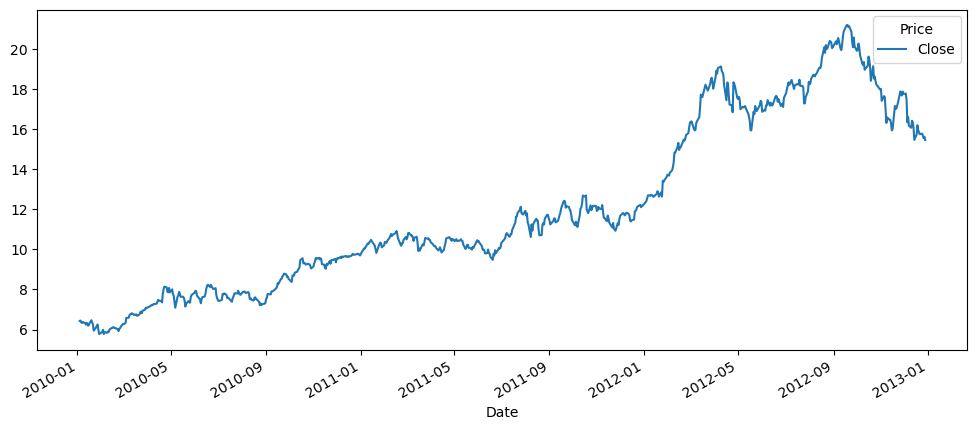

In [70]:
df_close.plot(figsize=(12,5))

In [74]:
# window = 7 days
df.rolling(window=7).mean().head(10)

Price,Close,Volume
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,NaN
2010-01-06,NaN,NaN
2010-01-07,NaN,NaN
2010-01-08,NaN,NaN
2010-01-11,NaN,NaN
2010-01-12,6.353240,518460800.0
2010-01-13,6.338814,534484000.0
2010-01-14,6.317562,510339600.0


Explanation:
* 2010-01-12 values represent the mean from the last 7 days.

<Axes: xlabel='Date'>

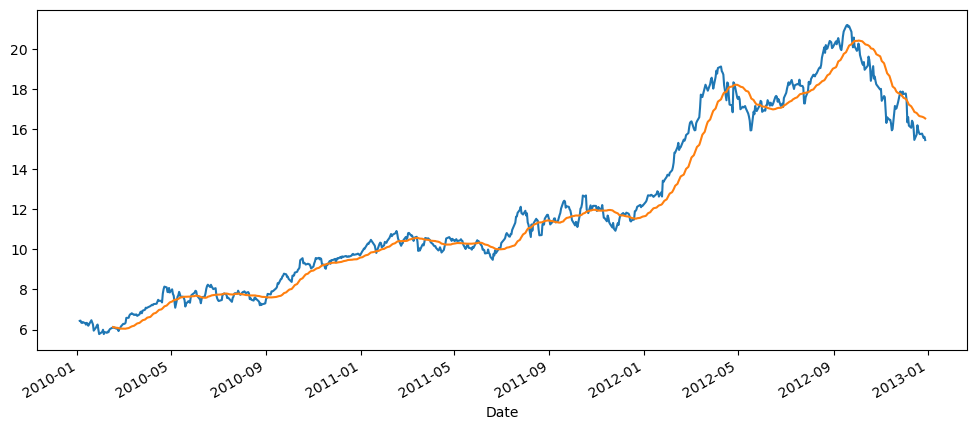

In [81]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()